# LaLiga Strikers: Finding out the best performers in 2023

In [1]:
import pandas as pd
import numpy as py
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt
import os as os


# Introduction

Spain's top professional football league, La Liga, is well-known around the world for its elite players, complex tactics, and intense competitiveness. Some of the top football players in the world are regularly produced by the league, and examining player performance offers important insights on team tactics, player growth, and the competition's general dynamics. An exploratory data analysis (EDA) of La Liga player statistics with an emphasis on attacking players is presented in this article. Finding the players who contribute the most goals, those who perform below expectations, and those who greatly exceed expectations in terms of goal-scoring production are our main objectives. To accomplish these goals, we will make use of a variety of statistical measures and visualizations. The analysis is based on 


## Load data set

In [2]:
goals_per_90 = pd.read_csv('player_goals_per_90.csv')  
expected_goals = pd.read_csv('player_expected_goals.csv')  
xg_per_90 = pd.read_csv('player_expected_goals_per_90.csv')  
total_scoring_attempts = pd.read_csv('player_total_scoring_attempts.csv')  



In [3]:
print("Goals per 90 columns:", goals_per_90.columns)  
print("Expected goals columns:", expected_goals.columns)  
print("xG per 90 columns:", xg_per_90.columns)  
print("Total scoring attempts columns:", total_scoring_attempts.columns)  

Goals per 90 columns: Index(['Rank', 'Player', 'Team', 'Goals per 90', 'Total Goals', 'Minutes',
       'Matches', 'Country'],
      dtype='object')
Expected goals columns: Index(['Rank', 'Player', 'Team', 'Expected Goals (xG)', 'Actual Goals',
       'Minutes', 'Matches', 'Country'],
      dtype='object')
xG per 90 columns: Index(['Rank', 'Player', 'Team', 'Expected Goals per 90', 'Goals per 90',
       'Minutes', 'Matches', 'Country'],
      dtype='object')
Total scoring attempts columns: Index(['Rank', 'Player', 'Team', 'Shots per 90', 'Shot Conversion Rate (%)',
       'Minutes', 'Matches', 'Country'],
      dtype='object')


In [4]:
# Rename columns to avoid duplicates  
goals_per_90.rename(columns={  
    'Goals per 90': 'Goals_per_90',  
    'Total Goals': 'Total_Goals',  
    'Minutes': 'Minutes_goals',  
    'Matches': 'Matches_goals',  
    'Country': 'Country_goals'  
}, inplace=True)  

expected_goals.rename(columns={  
    'Expected Goals (xG)': 'Expected_Goals_xG',  
    'Actual Goals': 'Actual_Goals',  
    'Minutes': 'Minutes_expected',  
    'Matches': 'Matches_expected',  
    'Country': 'Country_expected'  
}, inplace=True)  

xg_per_90.rename(columns={  
    'Expected Goals per 90': 'Expected_Goals_per_90',  
    'Goals per 90': 'Goals_per_90_xg',  
    'Minutes': 'Minutes_xg',  
    'Matches': 'Matches_xg',  
    'Country': 'Country_xg'  
}, inplace=True)  


total_scoring_attempts.rename(columns={  
    'Shots per 90': 'Shots_per_90',  
    'Shot Conversion Rate (%)': 'Shot_Conversion_Rate',  
    'Minutes': 'Minutes_scoring',  
    'Matches': 'Matches_scoring',  
    'Country': 'Country_scoring'  
}, inplace=True)  



In [5]:
attacking_stats = goals_per_90.merge(expected_goals, on='Player', suffixes=('', '_expected')) \
                                .merge(xg_per_90, on='Player', suffixes=('', '_xg')) \
                                .merge(total_scoring_attempts, on='Player', suffixes=('', '_scoring')) 
                            

# Display the combined DataFrame  
attacking_stats.head()

,Rank,Player,Team,Goals_per_90,Total_Goals,Minutes_goals,Matches_goals,Country_goals,Rank_expected,Team_expected,...,Minutes_xg,Matches_xg,Country_xg,Rank_scoring,Team_scoring,Shots_per_90,Shot_Conversion_Rate,Minutes_scoring,Matches_scoring,Country_scoring
0,1,Cristhian Stuani,Girona,1.04,9.0,782,31,URU,22,Girona,...,782,31,URU,2,Girona,3.9,26.5,782,31,URU
1,2,Bebé,Rayo Vallecano,0.93,2.0,193,19,CPV,185,Rayo Vallecano,...,193,19,CPV,1,Rayo Vallecano,7.5,12.5,193,19,CPV
2,3,Artem Dovbyk,Girona,0.83,24.0,2605,36,UKR,1,Girona,...,2605,36,UKR,22,Girona,2.9,28.2,2605,36,UKR
3,4,Alexander Sørloth,Villarreal,0.83,23.0,2491,34,NOR,8,Villarreal,...,2491,34,NOR,24,Villarreal,2.8,29.5,2491,34,NOR
4,5,Jude Bellingham,Real Madrid,0.74,19.0,2323,28,ENG,17,Real Madrid,...,2323,28,ENG,51,Real Madrid,2.4,30.2,2323,28,ENG


In [6]:
attacking_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   234 non-null    int64  
 1   Player                 234 non-null    object 
 2   Team                   234 non-null    object 
 3   Goals_per_90           234 non-null    float64
 4   Total_Goals            234 non-null    float64
 5   Minutes_goals          234 non-null    int64  
 6   Matches_goals          234 non-null    int64  
 7   Country_goals          234 non-null    object 
 8   Rank_expected          234 non-null    int64  
 9   Team_expected          234 non-null    object 
 10  Expected_Goals_xG      234 non-null    float64
 11  Actual_Goals           234 non-null    float64
 12  Minutes_expected       234 non-null    int64  
 13  Matches_expected       234 non-null    int64  
 14  Country_expected       234 non-null    object 
 15  Rank_x

In [7]:
attacking_stats.isna().sum()

Rank                     0
Player                   0
Team                     0
Goals_per_90             0
Total_Goals              0
Minutes_goals            0
Matches_goals            0
Country_goals            0
Rank_expected            0
Team_expected            0
Expected_Goals_xG        0
Actual_Goals             0
Minutes_expected         0
Matches_expected         0
Country_expected         0
Rank_xg                  0
Team_xg                  0
Expected_Goals_per_90    0
Goals_per_90_xg          0
Minutes_xg               0
Matches_xg               0
Country_xg               0
Rank_scoring             0
Team_scoring             0
Shots_per_90             0
Shot_Conversion_Rate     0
Minutes_scoring          0
Matches_scoring          0
Country_scoring          0
dtype: int64

In [8]:
attacking_stats.columns

Index(['Rank', 'Player', 'Team', 'Goals_per_90', 'Total_Goals',
       'Minutes_goals', 'Matches_goals', 'Country_goals', 'Rank_expected',
       'Team_expected', 'Expected_Goals_xG', 'Actual_Goals',
       'Minutes_expected', 'Matches_expected', 'Country_expected', 'Rank_xg',
       'Team_xg', 'Expected_Goals_per_90', 'Goals_per_90_xg', 'Minutes_xg',
       'Matches_xg', 'Country_xg', 'Rank_scoring', 'Team_scoring',
       'Shots_per_90', 'Shot_Conversion_Rate', 'Minutes_scoring',
       'Matches_scoring', 'Country_scoring'],
      dtype='object')

### Adding metrics

In [9]:

# Calculate xG to Goals Ratio  (Show if player is under or over performing)
attacking_stats['xG_to_Goals_Ratio'] = attacking_stats['Expected_Goals_xG'] / attacking_stats['Total_Goals']  

# Calculate the difference between xG and actual goals  (Show if player is under or over performing)
attacking_stats['xG_Difference'] = attacking_stats['Actual_Goals'] - attacking_stats['Expected_Goals_xG'] 




Per 90

In [10]:

# Calculate xG to Goals Ratio  (Show if player is under or over performing)
attacking_stats['xG_to_Goals_Ratio_Per_90'] = attacking_stats['Expected_Goals_per_90'] / attacking_stats['Goals_per_90']  

# Calculate the difference between xG and actual goals  (Show if player is under or over performing)
attacking_stats['xG_Difference_per_90'] = attacking_stats['Goals_per_90'] - attacking_stats['Expected_Goals_per_90'] 
 


In [11]:
# Identify top 20 players based on Goals per 90  
top_scorers = attacking_stats.nlargest(20, 'Goals_per_90') 

In [12]:
top_scorers['Matches_goals']

0     31
1     19
2     36
3     34
4     28
5     26
6     32
7     32
8     35
9     33
10    27
11    29
12    33
13    32
14    33
15    34
16    32
17    29
18    23
19    31
Name: Matches_goals, dtype: int64

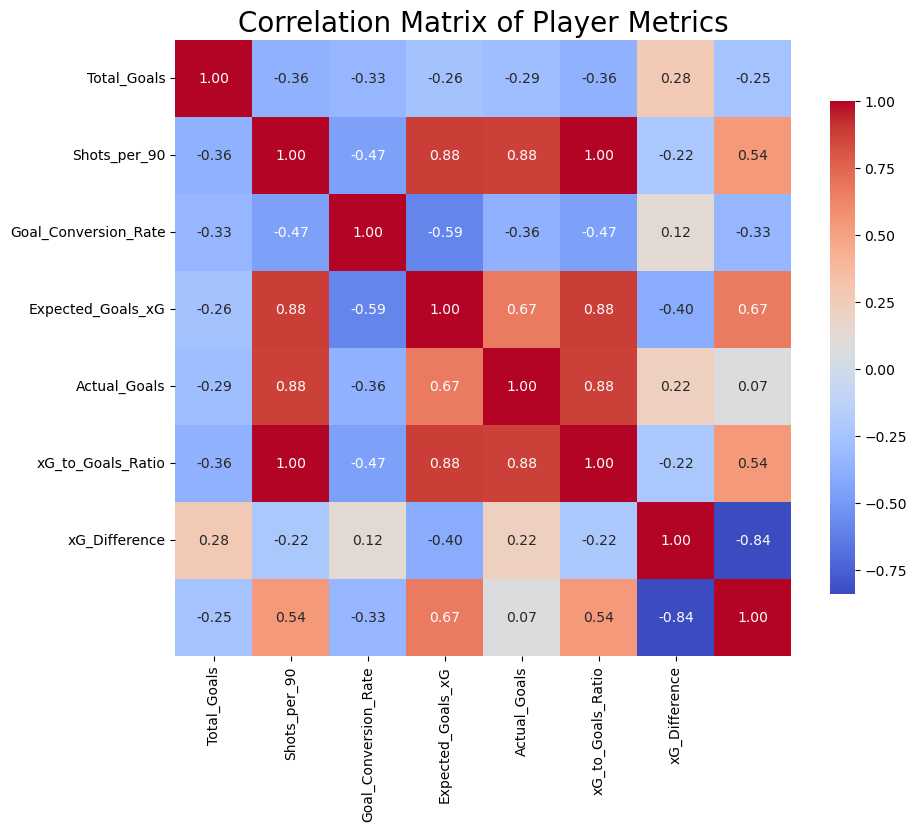

In [13]:

# Select relevant columns  
metrics = top_scorers[['Rank', 'Total_Goals', 'Shots_per_90', 'Goal_Conversion_Rate',   
                           'Expected_Goals_xG', 'Actual_Goals', 'xG_to_Goals_Ratio',   
                           'xG_Difference']]  

# Calculate the correlation matrix  
correlation_matrix = metrics.corr()  

# Set up the matplotlib figure  
plt.figure(figsize=(10, 8))  

# Create a heatmap to visualize the correlation matrix  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',   
            square=True, cbar_kws={"shrink": .8},   
            xticklabels=metrics.columns[1:], yticklabels=metrics.columns[1:])  

plt.title('Correlation Matrix of Player Metrics', fontsize=20)  
plt.show()

# Visualisation

## Finding out how strikers perform 

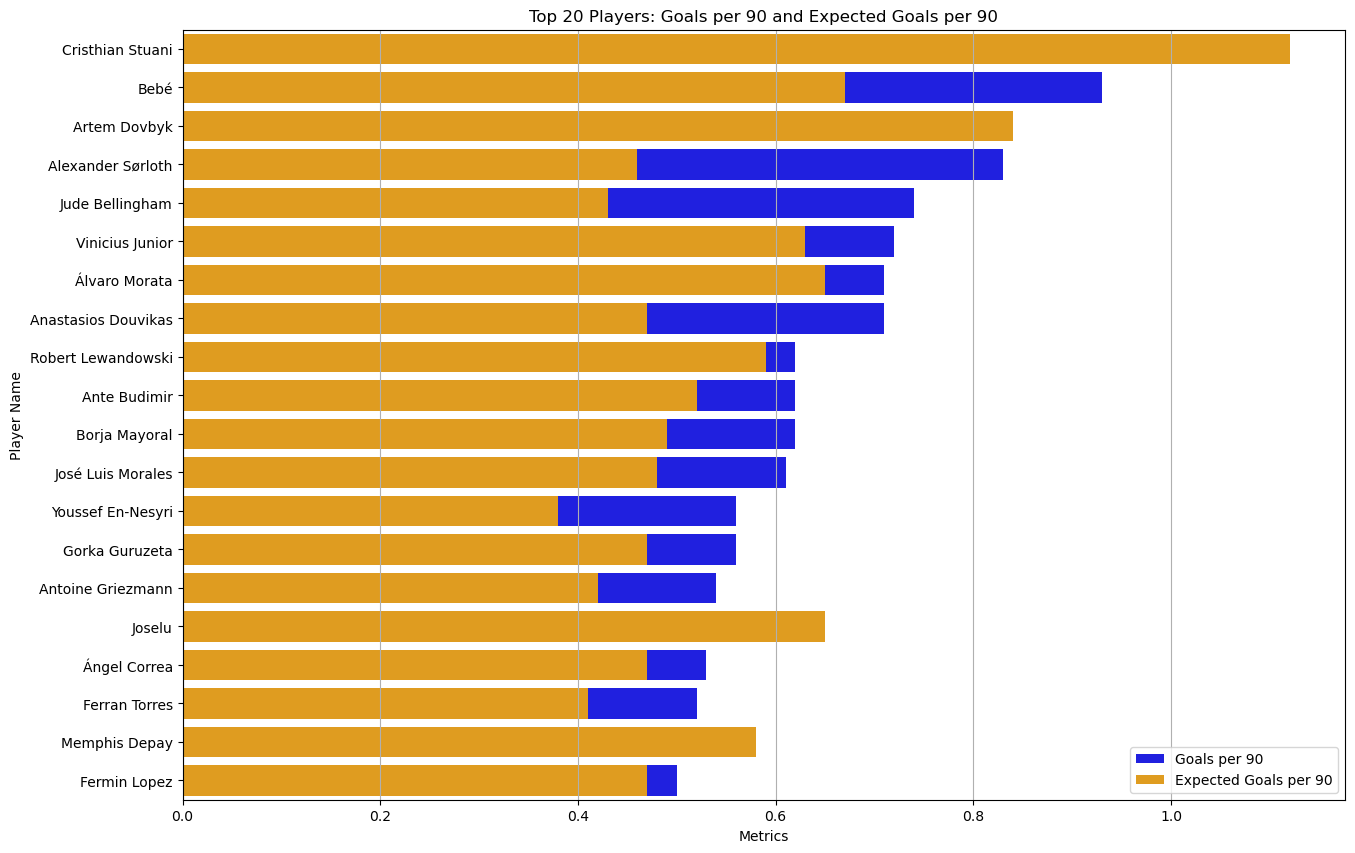

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(15, 10))

# Create the bar plot for Goals per 90
sns.barplot(data=top_scorers.head(20), 
            y='Player', 
            x='Goals_per_90', 
            color='blue', 
            label='Goals per 90')

# Create the bar plot for Expected Goals per 90
sns.barplot(data=top_scorers.head(20), 
            y='Player', 
            x='Expected_Goals_per_90', 
            color='orange', 
            label='Expected Goals per 90')


# Set labels and title
plt.title('Top 20 Players: Goals per 90 and Expected Goals per 90')
plt.xlabel('Metrics')
plt.ylabel('Player Name')
plt.legend()

# Adjust plot and show grid
plt.grid(axis='x')
plt.show()


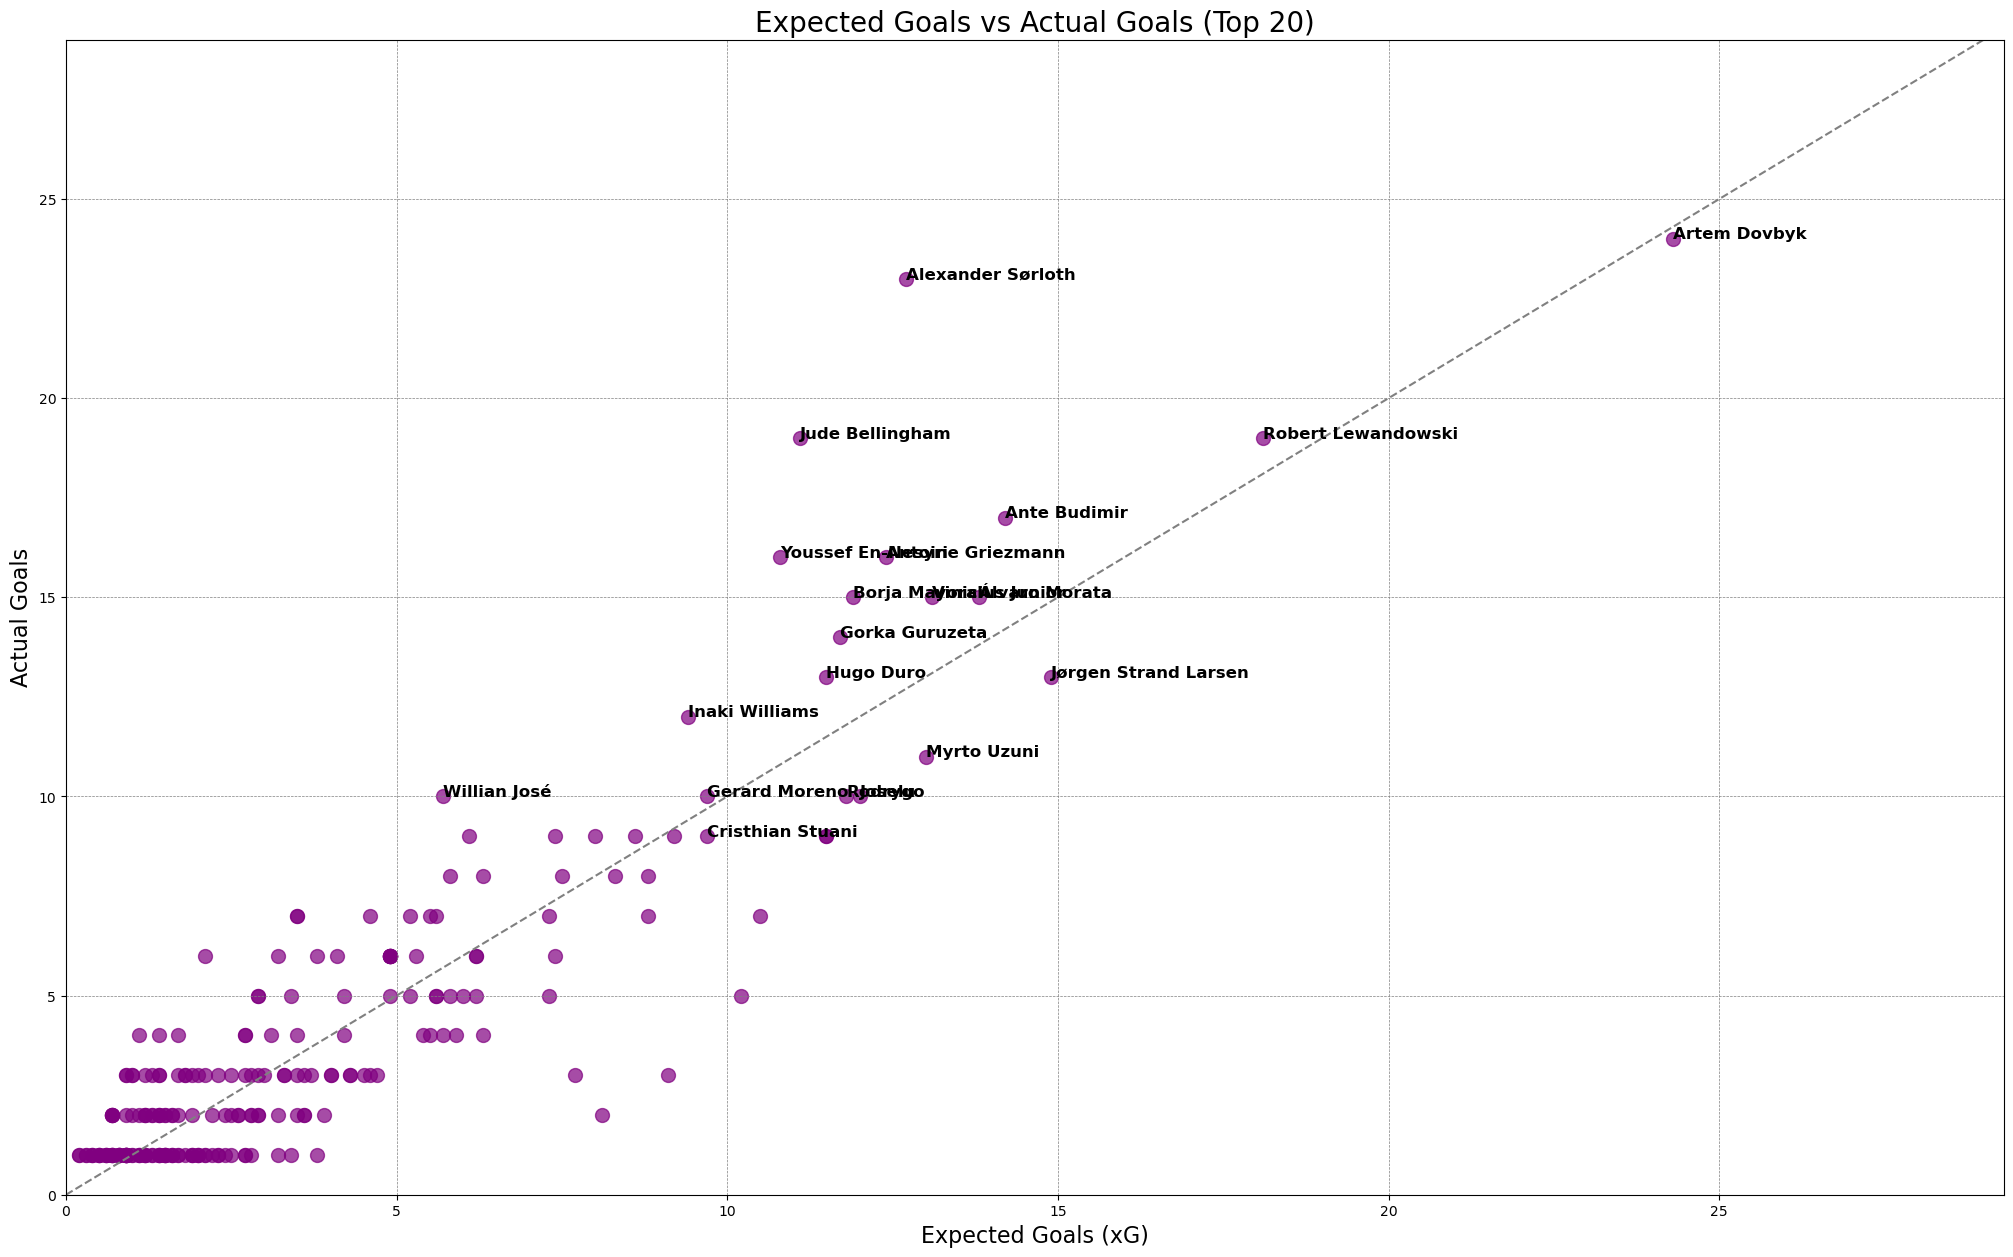

In [15]:
# Scatter Plot for Expected Goals vs Actual Goals  
import matplotlib.pyplot as plt  

# Create a scatter plot for Expected Goals vs Actual Goals  
plt.figure(figsize=(25,15))  # Increase figure size  
plt.scatter(attacking_stats['Expected_Goals_xG'], attacking_stats['Actual_Goals'],   
            color='purple', alpha=0.7, s=100)  # Adjust marker size and transparency  
plt.axline((0, 0), slope=1, color='grey', linestyle='--')  # Diagonal line for reference
# Add titles and labels with increased font size  
plt.title('Expected Goals vs Actual Goals (Top 20)' , fontsize=20)  
plt.xlabel('Expected Goals (xG)', fontsize=16)  
plt.ylabel('Actual Goals', fontsize=16)  

# Add a grid for better readability  
plt.grid(color='grey', linestyle='--', linewidth=0.5)  

# Annotate only the top players for clarity  
top_players = attacking_stats.nlargest(20, 'Actual_Goals')  # Adjust as needed  
for i, player in enumerate(top_players['Player']):  
    plt.annotate(player,   
                 (top_players['Expected_Goals_xG'].iloc[i], top_players['Actual_Goals'].iloc[i]),   
                 fontsize=12,   
                 color='black',   
                 weight='bold')  

# Show the plot  
plt.xlim(0, attacking_stats['Expected_Goals_xG'].max() + 5)  # Adjust x-axis limit  
plt.ylim(0, attacking_stats['Actual_Goals'].max() + 5)  # Adjust y-axis limit  
plt.show()


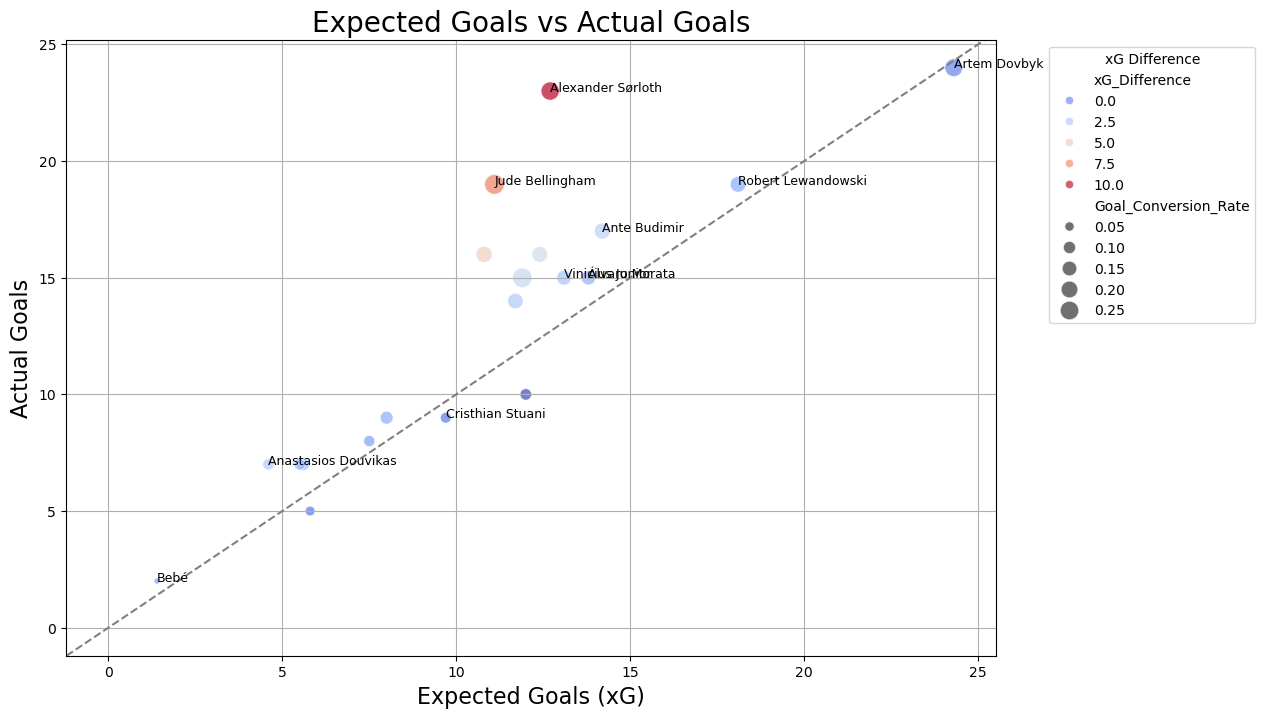

In [102]:
plt.figure(figsize=(12, 8))  
scatter = sns.scatterplot(data=top_scorers, x='Expected_Goals_xG', y='Actual_Goals',   
                          hue='xG_Difference', size='Goal_Conversion_Rate', sizes=(20, 200),   
                          palette='coolwarm', alpha=0.7)  

# Add player names as annotations  
for i in range(attacking_stats.head(10).shape[0]):  
    plt.text(attacking_stats['Expected_Goals_xG'].iloc[i],   
             attacking_stats['Actual_Goals'].iloc[i],   
             attacking_stats['Player'].iloc[i],   
             fontsize=9,   
             ha='left')  

plt.title('Expected Goals vs Actual Goals', fontsize=20)  
plt.xlabel('Expected Goals (xG)', fontsize=16)  
plt.ylabel('Actual Goals', fontsize=16)  
plt.axline((0, 0), slope=1, color='grey', linestyle='--')  # Diagonal line for reference  
plt.grid()  
plt.legend(title='xG Difference', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.show()

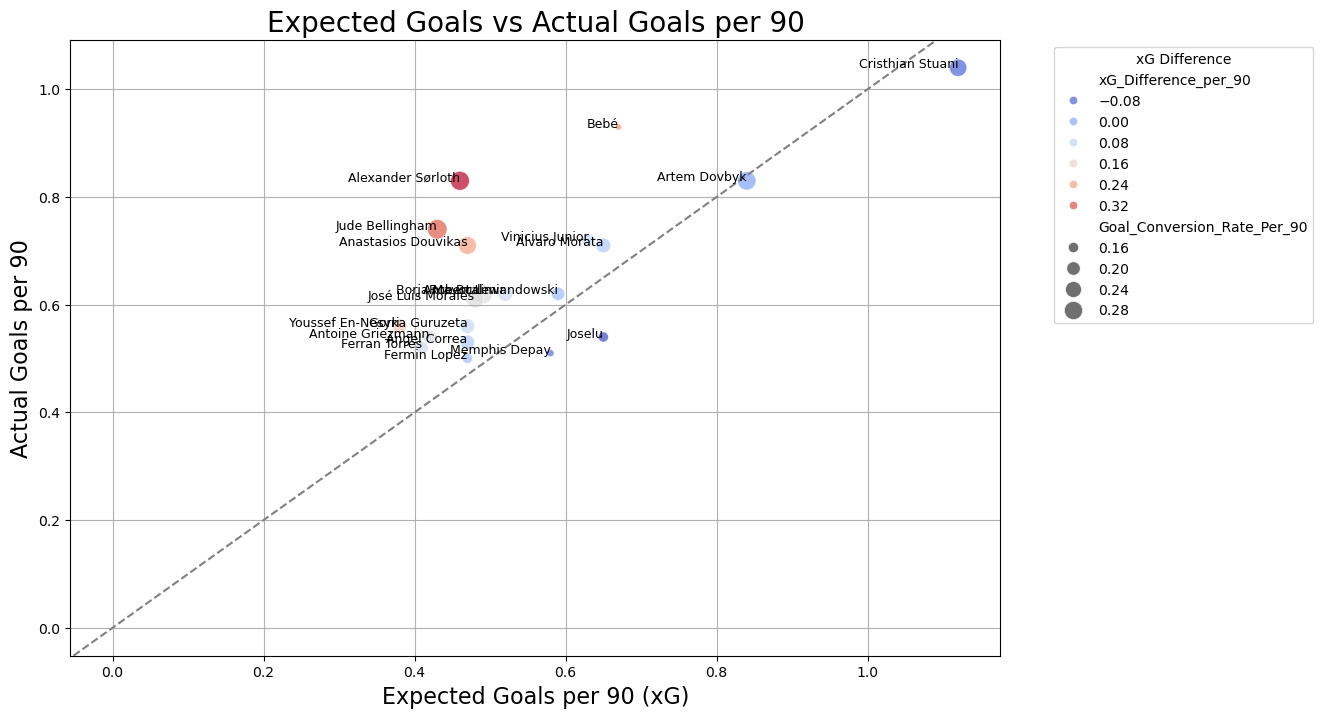

In [17]:
plt.figure(figsize=(12, 8))  
scatter = sns.scatterplot(data=top_scorers, x='Expected_Goals_per_90', y='Goals_per_90',   
                          hue='xG_Difference_per_90', size='Goal_Conversion_Rate_Per_90', sizes=(20, 200),   
                          palette='coolwarm', alpha=0.7)  
# 'Goals_per_90', 'Expected_Goals_per_90'
# Add player names as annotations  
for i in range(attacking_stats.head(20).shape[0]):  
    plt.text(attacking_stats['Expected_Goals_per_90'].iloc[i],   
             attacking_stats['Goals_per_90'].iloc[i],   
             attacking_stats['Player'].iloc[i],   
             fontsize=9,   
             ha='right')  

plt.title('Expected Goals vs Actual Goals per 90', fontsize=20)  
plt.xlabel('Expected Goals per 90 (xG)', fontsize=16)  
plt.ylabel('Actual Goals per 90', fontsize=16)  
plt.axline((0, 0), slope=1, color='grey', linestyle='--')  # Diagonal line for reference  
plt.grid()  
plt.legend(title='xG Difference', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.show()

 Insights:

1. **Over-performing Players**:
   - Players like **Cristian Stuani** and **Artem Dovbyk** exceed their **Expected Goals per 90** (xG), meaning their **Actual Goals per 90** (AG) is higher. These players are **over-performing**, converting more chances than expected due to high finishing skills or efficiency in front of goal.

2. **Under-performing Players**:
   - **Alexander Sørloth**, **Jude Bellingham**, and others have **Actual Goals per 90** lower than their **Expected Goals per 90**, indicating they are **under-performing**. These players may be missing key chances or struggling with accuracy, leading to fewer goals than expected.

3. **Consistent Performers**:
   - Players like **Robert Lewandowski** and **Vinícius Júnior** have **Actual Goals per 90** close to their **Expected Goals per 90**, indicating they are **consistent performers**. They convert chances at a rate close to expectations.

How to Identify:

- **Over-performing**: When **AG > xG** (Actual Goals exceed Expected Goals).
- **Under-performing**: When **AG < xG** (Actual Goals are lower than Expected Goals).
- **Consistent**: When **AG ≈ xG** (Actual Goals closely match Expected Goals). 



## Shot Conversion

C:\Users\User\AppData\Local\Temp\ipykernel_9248\2312421414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=attacking_stats.head(20).sort_values('Goal_Conversion_Rate', ascending=False),


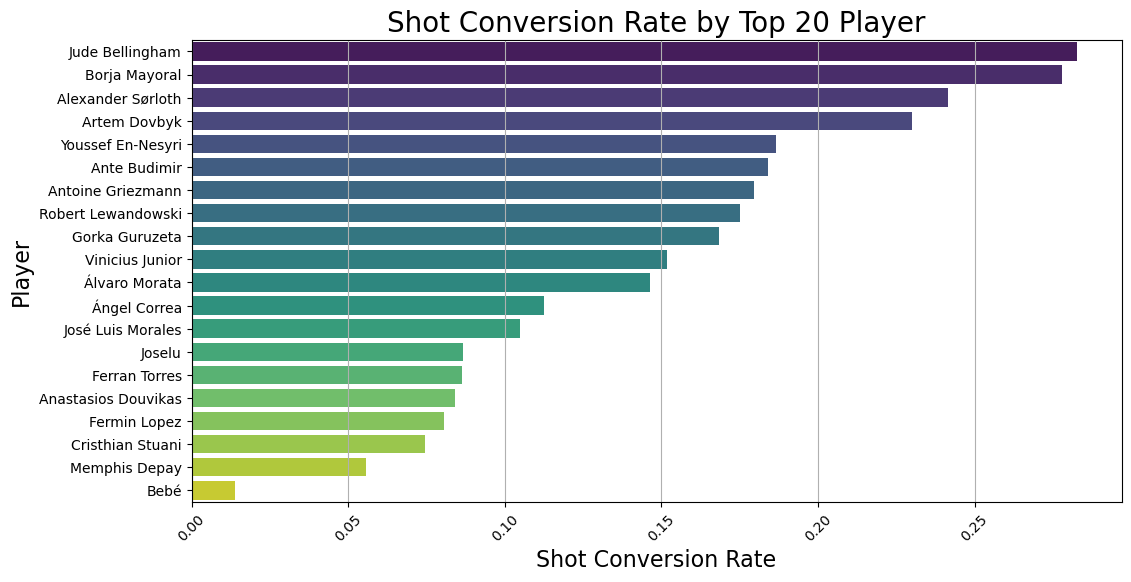

In [100]:
# Visualization: Bar plot for Goal Conversion Rate  
plt.figure(figsize=(12, 6))  
sns.barplot(data=attacking_stats.head(20).sort_values('Goal_Conversion_Rate', ascending=False),   
            y='Player', x='Goal_Conversion_Rate', palette='viridis')  

plt.title('Shot Conversion Rate by Top 20 Player', fontsize=20)  
plt.ylabel('Player', fontsize=16)  
plt.xlabel('Shot Conversion Rate', fontsize=16)  
plt.xticks(rotation=45)  
plt.grid(axis='x')  
plt.show()  

C:\Users\User\AppData\Local\Temp\ipykernel_9248\3726676736.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=attacking_stats.head(20).sort_values('Goal_Conversion_Rate_Per_90', ascending=False),


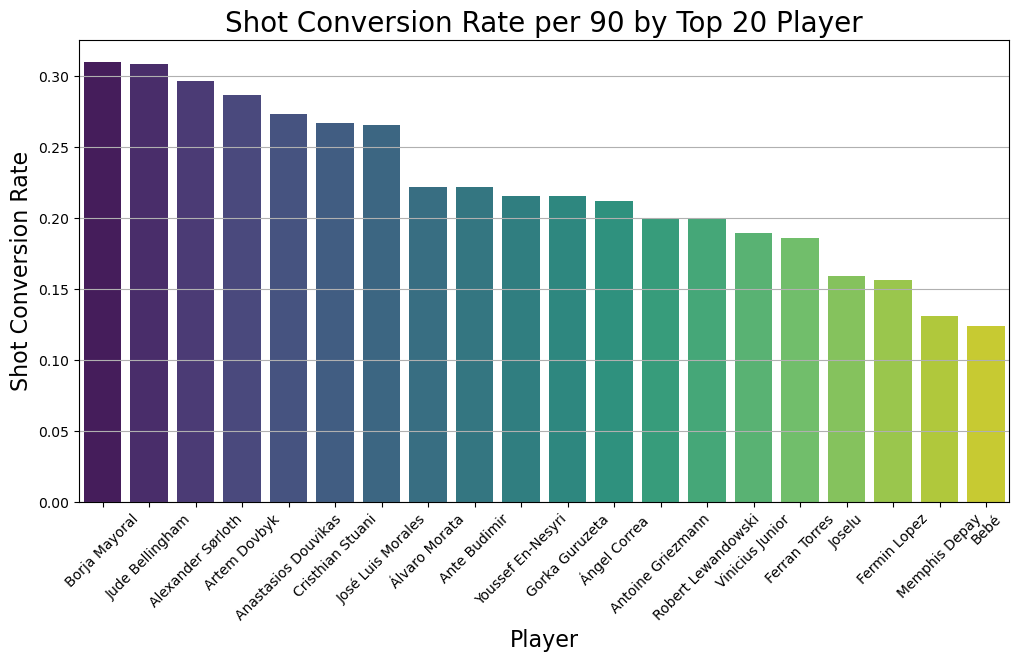

In [19]:
# Visualization: Bar plot for Goal Conversion Rate  
plt.figure(figsize=(12, 6))  
sns.barplot(data=attacking_stats.head(20).sort_values('Goal_Conversion_Rate_Per_90', ascending=False),   
            x='Player', y='Goal_Conversion_Rate_Per_90', palette='viridis')  

plt.title('Shot Conversion Rate per 90 by Top 20 Player', fontsize=20)  
plt.xlabel('Player', fontsize=16)  
plt.ylabel('Shot Conversion Rate', fontsize=16)  
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.show()  

1. **Top Performers**:
   - **Borja Mayoral** and **Jude Bellingham** have the highest **Shot Conversion Rate** and **Shot Conversion Rate per 90**, suggesting that they are highly clinical in front of goal. These players are **over-performing** as they convert a higher percentage of their shots into goals.

2. **Consistent Performers**:
   - Players such as **Alexander Sørloth**, **Artem Dovbyk**, and **Anastasios Douvikas** show a **steady conversion rate** in both overall and per 90 metrics. They are consistent in their finishing, converting chances efficiently but not excessively.

3. **Lower Performers**:
   - **Fermin Lopez**, **Memphis Depay**, and **Bebé** have the lowest **Shot Conversion Rates** and **Shot Conversion Rates per 90**. These players are **under-performing**, as they struggle to convert their chances, likely missing more than expected relative to their opportunities.

 Identifying Under, Over, and Consistent Performers:
- **Over-performing**: Players who have a **higher Shot Conversion Rate** and **Shot Conversion Rate per 90** compared to their peers (e.g., **Borja Mayoral**, **Jude Bellingham**).
- **Under-performing**: Players with a **lower Shot Conversion Rate** and **Shot Conversion Rate per 90** (e.g., **Fermin Lopez**, **Bebé**).
- **Consistent**: Players with a **steady conversion rate**, not showing significant deviation in either metric (e.g., **Artem Dovbyk**, **José Luis Morales**).


## Categorizing Players

In [20]:
top_scorers.describe()

,Rank,Goals_per_90,Total_Goals,Minutes_goals,Matches_goals,Rank_expected,Expected_Goals_xG,Actual_Goals,Minutes_expected,Matches_expected,...,Shots_per_90,Shot_Conversion_Rate,Minutes_scoring,Matches_scoring,Goal_Conversion_Rate,xG_to_Goals_Ratio,xG_Difference,Goal_Conversion_Rate_Per_90,xG_to_Goals_Ratio_Per_90,xG_Difference_per_90
count,20.00000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,10.50000,0.662000,12.85000,1783.550000,30.450000,29.750000,10.710000,12.85000,1783.550000,30.450000,...,3.150000,22.235000,1783.550000,30.450000,0.146144,0.850811,2.14000,0.221852,0.850827,0.102000
std,5.91608,0.150564,6.06348,755.407765,4.198684,41.367258,5.118686,6.06348,755.407765,4.198684,...,1.149599,5.619634,755.407765,4.198684,0.074878,0.175855,2.92276,0.056709,0.172928,0.125974
min,1.00000,0.500000,2.00000,193.000000,19.000000,1.000000,1.400000,2.00000,193.000000,19.000000,...,2.000000,12.500000,193.000000,19.000000,0.014035,0.552174,-2.00000,0.124000,0.554217,-0.110000
25%,5.75000,0.540000,7.75000,1162.250000,28.750000,7.500000,7.075000,7.75000,1162.250000,28.750000,...,2.600000,19.000000,1162.250000,28.750000,0.085689,0.756250,0.57500,0.188534,0.763441,0.030000
50%,10.50000,0.620000,14.50000,1890.500000,32.000000,15.000000,11.400000,14.50000,1890.500000,32.000000,...,2.800000,21.900000,1890.500000,32.000000,0.149153,0.835504,1.45000,0.215385,0.838998,0.095000
75%,15.25000,0.725000,16.25000,2459.500000,33.000000,37.000000,12.800000,16.25000,2459.500000,33.000000,...,3.250000,26.900000,2459.500000,33.000000,0.184607,0.941283,2.87500,0.268269,0.942903,0.142500
max,20.00000,1.040000,24.00000,2758.000000,36.000000,185.000000,24.300000,24.00000,2758.000000,36.000000,...,7.500000,31.900000,2758.000000,36.000000,0.282738,1.200000,10.30000,0.310000,1.203704,0.370000


In [21]:
def categorize_attacker(row, median_conversion, median_xg_difference):  
    # Comprehensive scoring performance evaluation  
    if (row['xG_Difference'] > median_xg_difference and   
        row['Goal_Conversion_Rate_Per_90'] > median_conversion):  
        return 'Elite Striker'  
    
    elif row['xG_Difference'] > 0 and row['Goal_Conversion_Rate'] > median_conversion:  
        return 'Consistent Scorer'  
    
    elif row['Expected_Goals_per_90'] > row['Goals_per_90'] and row['Goal_Conversion_Rate'] > median_conversion:  
        return 'Potential Breakout'  
    
    elif row['xG_Difference'] > 0:  
        return 'Overperformer'  
    
    elif row['Goal_Conversion_Rate'] > median_conversion:  
        return 'Efficient Finisher'  
    
    else:  
        return 'Underperformer'  

# Calculate medians for categorization  
median_conversion = attacking_stats['Goal_Conversion_Rate_Per_90'].median()  
median_xg_difference = attacking_stats['xG_Difference'].median()  

# Apply categorization  
top_scorers['Performance_Category'] = attacking_stats.apply(  
    lambda row: categorize_attacker(row, median_conversion, median_xg_difference),   
    axis=1  
)  

# Performance Categories Distribution  
print("\nPerformance Categories Distribution:")  
print(top_scorers['Performance_Category'].value_counts())  



Performance Categories Distribution:
Performance_Category
Elite Striker         16
Underperformer         3
Potential Breakout     1
Name: count, dtype: int64


<Figure size 1500x800 with 0 Axes>

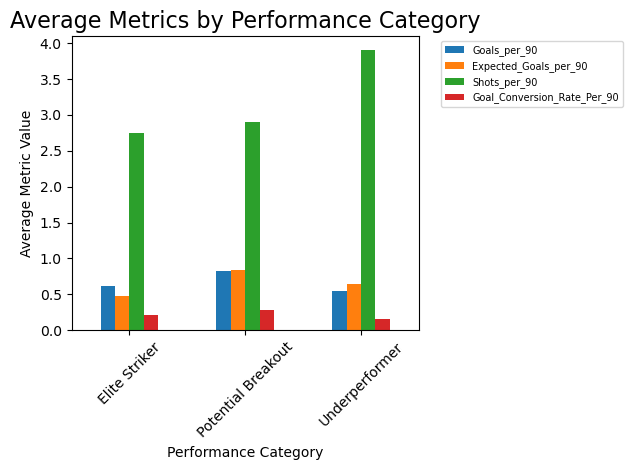

In [96]:
plt.figure(figsize=(15, 8))  
performance_category_data = top_scorers.groupby('Performance_Category')[  
    ['Goals_per_90', 'Expected_Goals_per_90', 'Shots_per_90', 'Goal_Conversion_Rate_Per_90']  
].median()  

performance_category_data.plot(kind='bar', rot=45)  
plt.title('Average Metrics by Performance Category', fontsize=16)  
plt.xlabel('Performance Category', fontsize=10)  
plt.ylabel('Average Metric Value', fontsize=10) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=7)
plt.tight_layout()  
plt.show()  




In [88]:
print("\nTop Performers in Each Category:")  
for category in top_scorers['Performance_Category'].unique():  
    print(f"\n{category}:")  
    category_top = top_scorers[top_scorers['Performance_Category'] == category].nlargest(3, 'Goals_per_90')  
    print(category_top[['Player', 'Team', 'Goals_per_90', 'xG_Difference_per_90', 'Goal_Conversion_Rate_Per_90']])


Top Performers in Each Category:

Underperformer:
              Player                Team  Goals_per_90  xG_Difference_per_90  \
0   Cristhian Stuani              Girona          1.04                 -0.08   
15            Joselu         Real Madrid          0.54                 -0.11   
18     Memphis Depay  Atlético de Madrid          0.51                 -0.07   

    Goal_Conversion_Rate_Per_90  
0                      0.266667  
15                     0.158824  
18                     0.130769  

Elite Striker:
              Player            Team  Goals_per_90  xG_Difference_per_90  \
1               Bebé  Rayo Vallecano          0.93                  0.26   
3  Alexander Sørloth      Villarreal          0.83                  0.37   
4    Jude Bellingham     Real Madrid          0.74                  0.31   

   Goal_Conversion_Rate_Per_90  
1                     0.124000  
3                     0.296429  
4                     0.308333  

Potential Breakout:
         Player   

# Conclusion:

Based on the analysis of LaLiga strikers, several key insights have emerged:

1. **Elite Strikers**: 
   Players such as **Cristian Stuani**, **Artem Dovbyk**, and **Bebé** have demonstrated excellent finishing skills. Their **Goals per 90** are consistently higher than **Expected Goals per 90**, indicating they are over-performing in terms of scoring.

2. **Potential Breakout**: 
   Players like **Jude Bellingham** and **Vinícius Júnior** show consistent performance with their **Expected Goals per 90** closely matching their **Goals per 90**. These players have the potential to become even more clinical with focused development.

3. **Underperformers**:
   Players such as **Youssef En-Nesyri**, **Gorka Guruzeta**, and **Antoine Griezmann** are underperforming, scoring fewer goals than their expected values. This gap indicates they may need further work on shot accuracy and decision-making in key moments.
-----
# Recommendations:

1. **Focus on Goal Conversion Training**:
   - For the **underperformers**, it would be beneficial to concentrate on improving **shot accuracy** and **finishing techniques**. Enhancing their ability to convert chances into goals could help close the gap between their **Expected Goals per 90** and **Goals per 90**.

2. **Leverage Elite Strikers**:
   - Teams should capitalize on the **elite strikers** such as **Cristian Stuani** and **Artem Dovbyk**, who are exceeding their expected goal count. Strategic plays to create more chances for these players could increase their contribution to the team's success.

3. **Nurture Potential Breakout Players**:
   - Players like **Jude Bellingham** and **Vinícius Júnior** should be given additional opportunities to develop their finishing ability. With proper guidance and training, these players can elevate their performance and become even more prolific in front of goal.

4. **Data-Driven Player Development**:
   - Using **Expected Goals (xG)** as a key metric for player development can help focus training efforts where they are needed most. Focusing on **underperforming** players with consistent xG but lower goals can help fine-tune their finishing abilities and bring their actual goals closer to expected goals.

By addressing the finishing of underperformers, leveraging the potential of elite strikers, and nurturing the growth of consistent performers, teams can maximize their goal-scoring potential and increase their chances of success in LaLiga.